In [567]:
from enum import Enum

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [568]:
def custom_polygon():
    %matplotlib tk
    from matplotlib.backend_bases import MouseButton
    '''
    Cała ta funkcja umożliwia zadawanie wierzchołków z myszki.
    Po uruchomieniu kodu, włączy się okno, na którym należy klikać lewym przyciskiem myszy
    w miejsca, w których chcemy, aby były nasze kolejne wierzchołki. Istnieje możliwość zapisania
    figury, jeśli klikniemy w lewym dolnym rogu na ikonkę zapisu.
    '''
    c_polygon = []
    
    fig, ax = plt.subplots()
    ax.set_title('Polygon')
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    
    def on_click(event):
        if event.button is MouseButton.LEFT:
            x = event.xdata
            y = event.ydata
            c_polygon.append((x, y))
            ax.plot(*c_polygon[-1], marker='.', color='blue')
            plt.show()
    
    plt.connect('button_press_event', on_click)
    plt.show(block=True)
        
    %matplotlib inline
    
    return c_polygon

In [569]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [570]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()

In [571]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [572]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

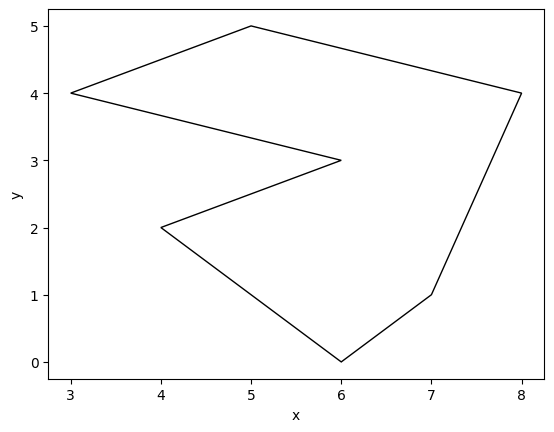

In [573]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

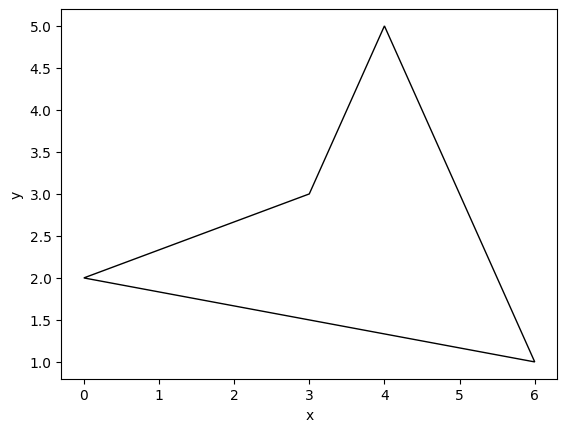

In [574]:
polygon = [(6, 1), (4, 5), (3, 3), (0, 2)]
draw_polygon(polygon)

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [575]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    
    change_points = 0
    previous_difference = polygon[1][1] - polygon[0][1]
    
    if previous_difference == 0:
        return False
    
    for i in range(2, len(polygon)):
        current_difference = polygon[i][1] - polygon[i - 1][1]
        
        if current_difference == 0:
            return False
        
        if current_difference > 0 > previous_difference:
            change_points += 1
              
        if current_difference < 0 < previous_difference:
            change_points += 1

        previous_difference = current_difference
                
    return change_points <= 2
    

Przeprowadź test poprawności powyższej funkcji.

In [576]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.031s


Sprawdź monotoniczność swojego wielokątu.

In [577]:
print(is_y_monotonic(polygon))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

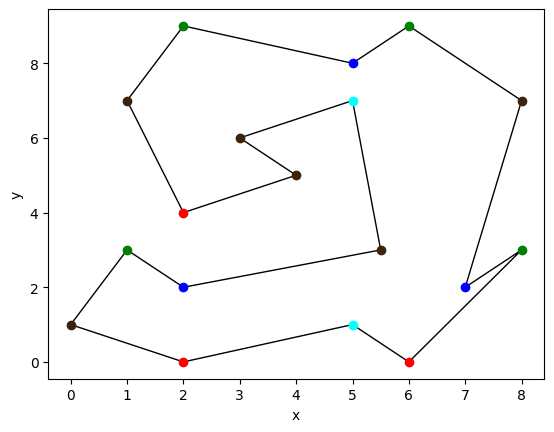

In [578]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [579]:
def determinant(a, b, c):
    return (b[0] - a[0]) * (c[1] - a[1]) - (c[0] - a[0]) * (b[1] - a[1])

In [580]:
def color_vertex(polygon):

    n = len(polygon)
    colors = [-1 for _ in range(n)]
    
    for i in range(n):
        current = polygon[i]
        previous = polygon[i - 1]
        next = polygon[(i + 1) % n]
        
        if previous[1] < current[1] and next[1] < current[1]:
            # current is over both neighbors
            if determinant(previous, current, next) > 0:
                # 0 < alpha < 180
                colors[i] = 0
            else:
                # 180 < alpha < 360
                colors[i] = 3
                
        elif previous[1] > current[1] and next[1] > current[1]:
            # current is below both neighbors
            if determinant(previous, current, next) > 0:
                # 0 < alpha < 180
                colors[i] = 1
            else:
                # 180 < alpha < 360
                colors[i] = 2
                
        else:
            colors[i] = 4
        
    return colors

Przeprowadź test poprawności powyższej funkcji. 

In [581]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.031s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

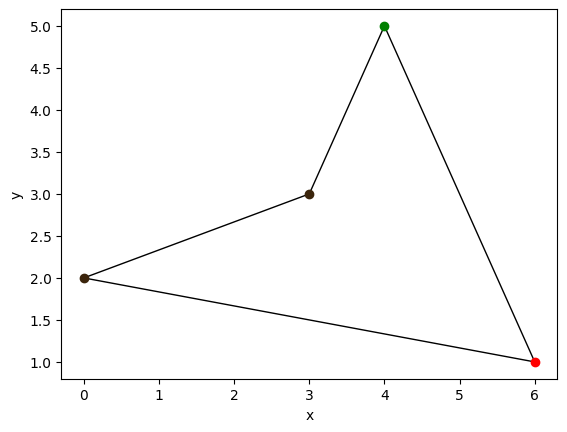

In [582]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

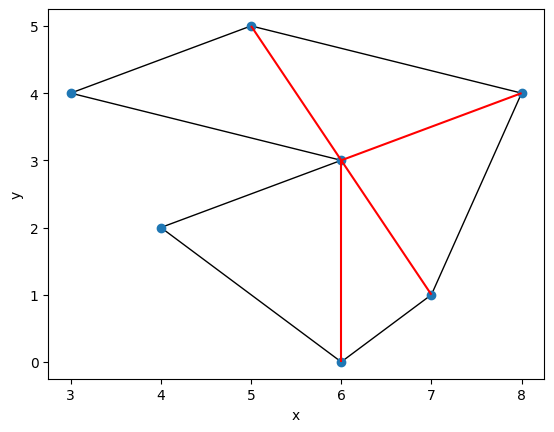

In [583]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [584]:
class Point:
        def __init__(self, position: tuple, color, side, idx):
            self.pos = position
            self.color = color
            self.side = side
            self.idx = idx
            
        def __str__(self):
            return f"Point: {self.pos}, color: {self.color}, side: {self.side}, idx: {self.idx}"


class Point_side(Enum):
    left = 1
    right = 2

In [585]:
def divide_points(points):
    
    # Funkcja dzieli punkty na dwa łańcuchy - prawy i lewy
    # Element początkowy i końcowy są przydzielane do różnych łancuchów
    
    start = points.index(max(points, key=lambda x: x[1]))
    end = points.index(min(points, key=lambda x: x[1]))
    
    sides = [None for _ in range(len(points))]
    
    sides[start] = Point_side.left
    sides[end] = Point_side.right
    
    i = (end + 1) % len(points)
    while i != start:
        sides[i] = Point_side.right
        i = (i + 1) % len(points)
    
    i = (start + 1) % len(points)
    while i != end:
        sides[i] = Point_side.left
        i = (i + 1) % len(points)
        
    return sides


In [586]:
def triangle_inside_polygon(a, b, c):
    d = determinant(a.pos, b.pos, c.pos)
                    
    if c.side == Point_side.left:
        return d > 0
    
    return d < 0


In [587]:
def edge(points, a, b):
    return True if (abs(a.idx - b.idx) == 1 or 
                    abs(a.idx - b.idx) == len(points) - 1) \
        else False


In [588]:
def triangulation(polygon, show_gif=False):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], 
    oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
        
    if not is_y_monotonic(polygon):
        raise Exception("Polygon is not y-monotonic")
    
    n = len(polygon)    
    diagonals = set()
    
    colors = color_vertex(polygon)
    string_colors = ['green', 'red', 'blue', 'cyan', '#1f0605']
    
    ########## Visualisation ##########
    vis = Visualizer()
    vis.add_polygon(polygon, fill=False)
    
    for point in polygon:
        vis.add_point(point, color=string_colors[colors[polygon.index(point)]])
    ###################################
    
    side = divide_points(polygon)
    
    points = [Point(polygon[i], colors[i], side[i], i) for i in range(n)]
    
    points.sort(key=lambda x: x.pos[1], reverse=True)        
    
    stack = [points[0], points[1]]
        
    for i in range(2, n):
        v = points[i]
        
        new_stack = []
        if not stack[-1].side == v.side:
            # v and stack[-1] are on different chains
            while len(stack) > 0:
                p = stack.pop()
                
                if not edge(points, p, v) and (v.idx, p.idx) not in diagonals:
                    diagonals.add((p.idx, v.idx))
                    
                    ###################################
                    vis.add_line_segment([(p.pos, v.pos)], color='red')
                    vis.show()
                    ###################################
                    
            new_stack.append(points[i - 1])
            new_stack.append(v)
            
        else:
            # v and stack[-1] are on the same chain
            while len(stack) >= 2:
                p = stack[-1]
                
                # O(1)
                if triangle_inside_polygon(stack[-2], stack[-1], v) and not edge(points, p, v) and (v.idx, p.idx) not in diagonals:
                    diagonals.add((v.idx, p.idx))
                                        
                    ###################################
                    vis.add_line_segment([(p.pos, v.pos)], color='red')
                    vis.show()
                    ###################################
                    
                    stack.pop()
                    
                # O(1)
                elif triangle_inside_polygon(stack[-2], stack[-1], v) and not edge(points, stack[-2], v) and (v.idx, stack[-2].idx) not in diagonals:
                    diagonals.add((v.idx, stack[-2].idx))
                    
                    ###################################
                    vis.add_line_segment([(stack[-2].pos, v.pos)], color='red')
                    vis.show()
                    ###################################
                    
                    stack.pop()
                    
                else:
                    new_stack.append(stack.pop())
            
            new_stack.append(stack.pop())
            new_stack.reverse()
            
            new_stack.append(v)
                        
        stack = new_stack
            
    ###################################
    vis.show()
    
    if show_gif:
        vis.show_gif(256)
        vis.show_gif(256)
        vis.show_gif(256)
    ###################################
    
    return list(diagonals)

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: Do przechowywania wielokątu użyłem listy obiektów klasy Point, która zawiera informacje o kolorze, stronie, indeksie oraz pozycji punktu. Do przechowywania triangulacji użyłem zbioru krotek, które zawierają indeksy punktów, które są połączone przekątną. Wybrałem set, ponieważ dzięki temu mogłem sprawdzić, czy dana przekątna już istnieje w zbiorze w czasie stałym. 

Przeprowadź testy poprawności powyższej funkcji.


Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: 

C:\Users\jasiek\Desktop\2\ComputationalGeometry\bitalg\visualizer\plot\plot.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 2.453s


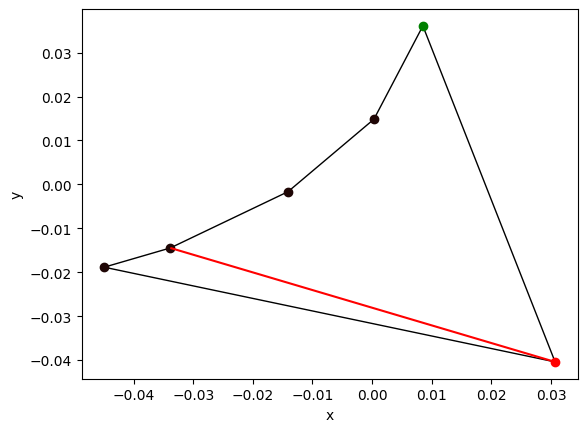

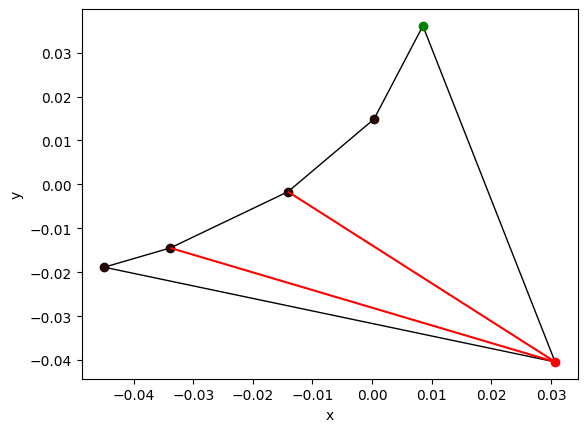

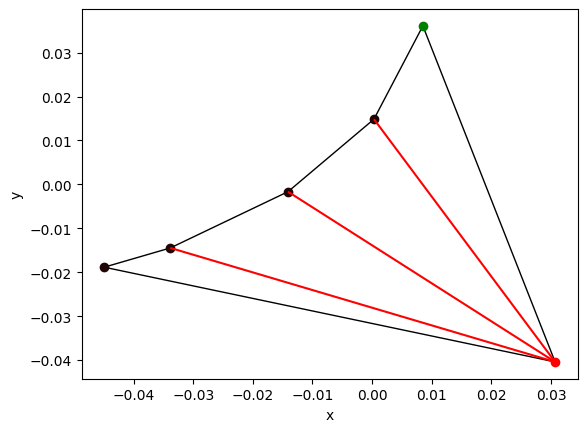

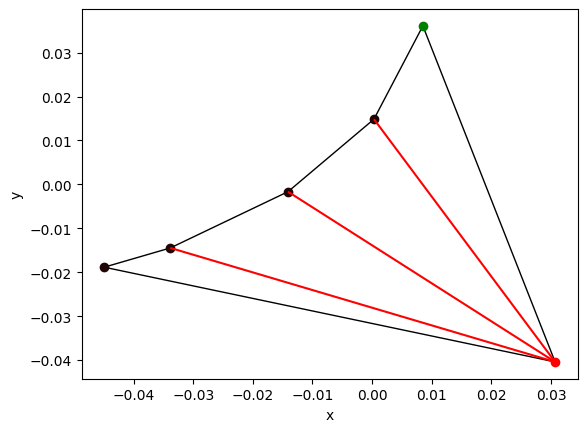

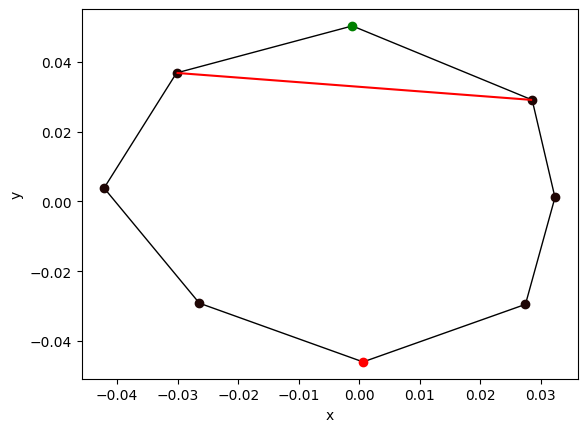

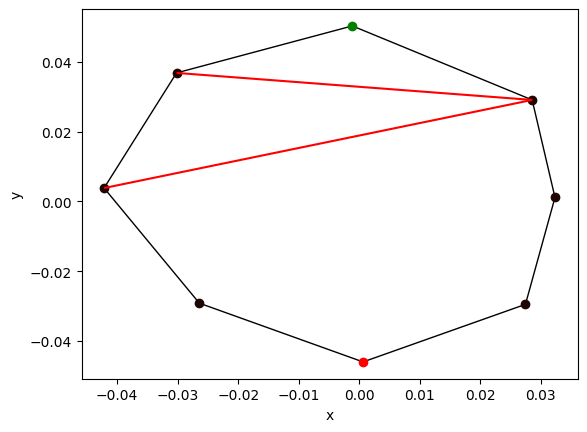

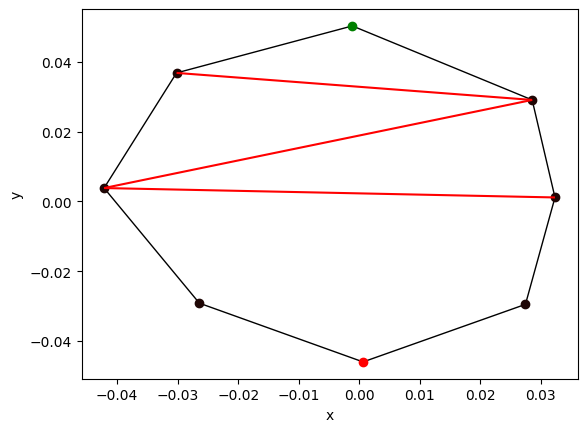

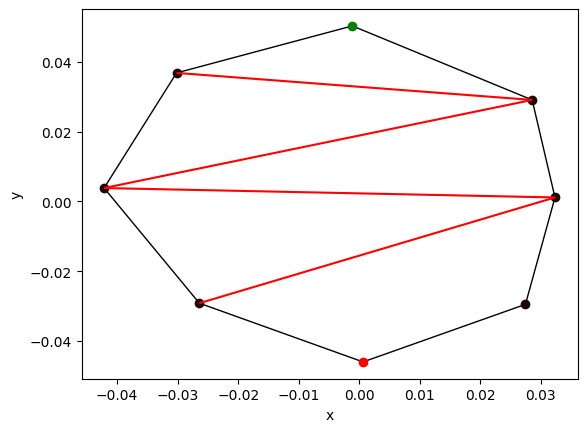

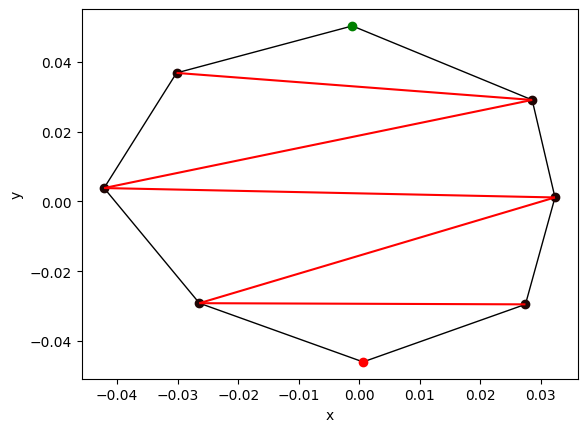

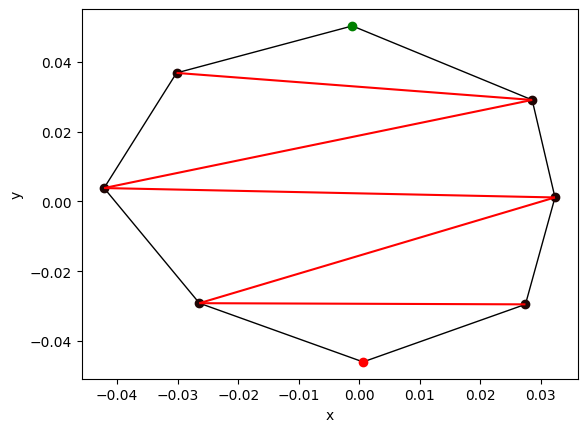

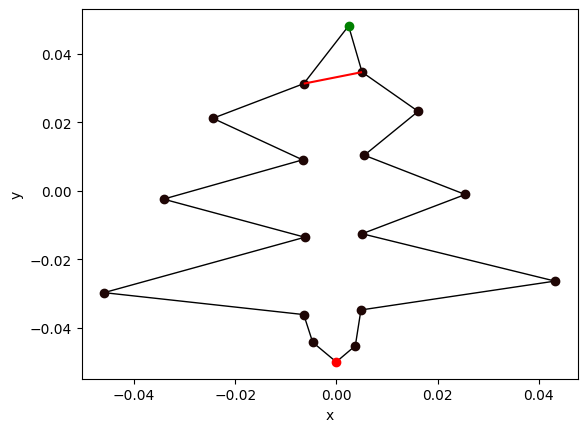

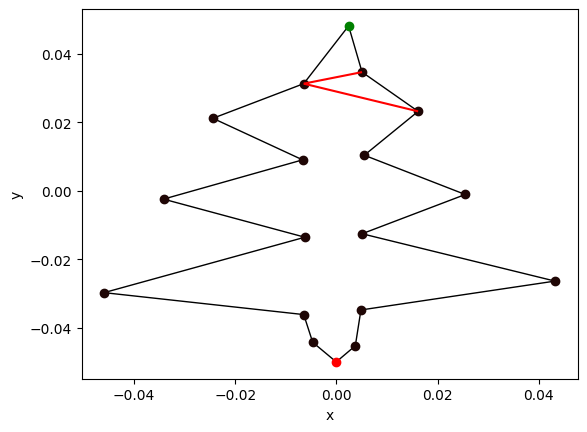

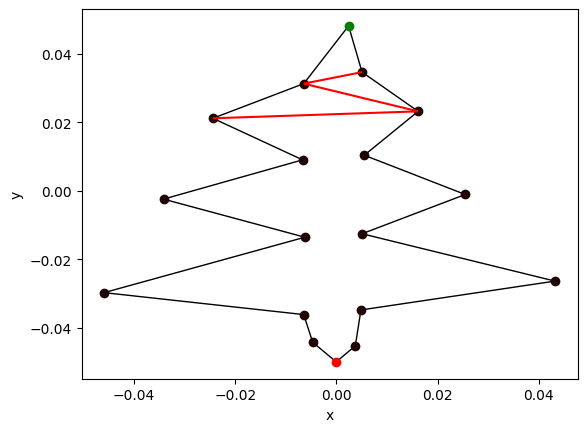

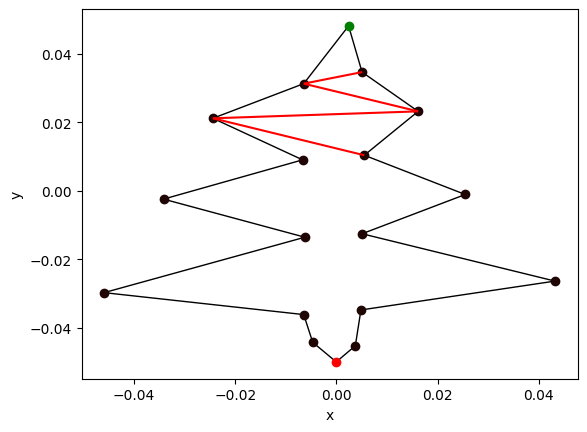

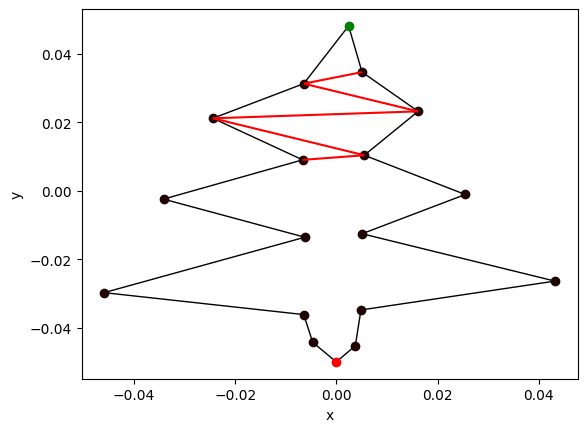

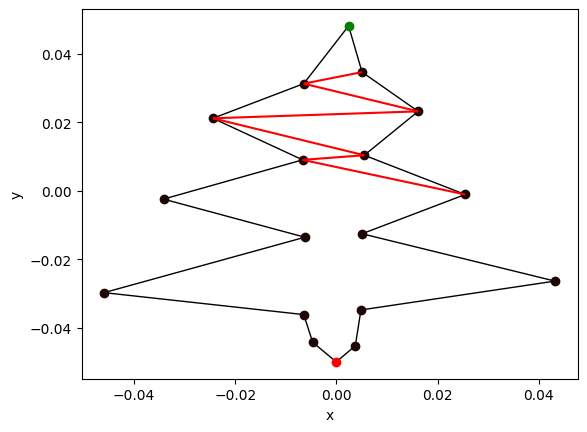

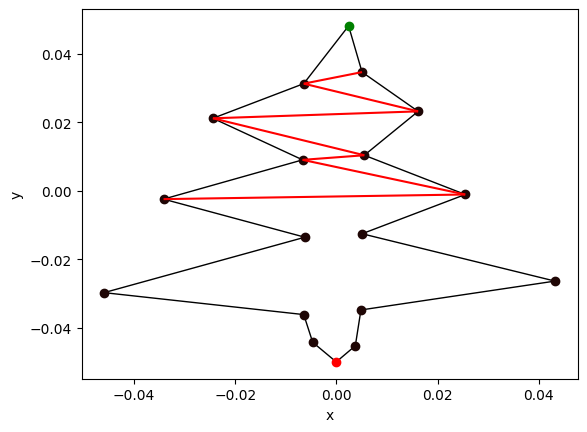

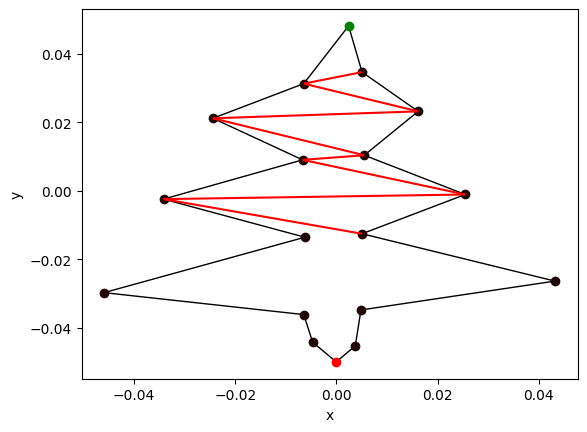

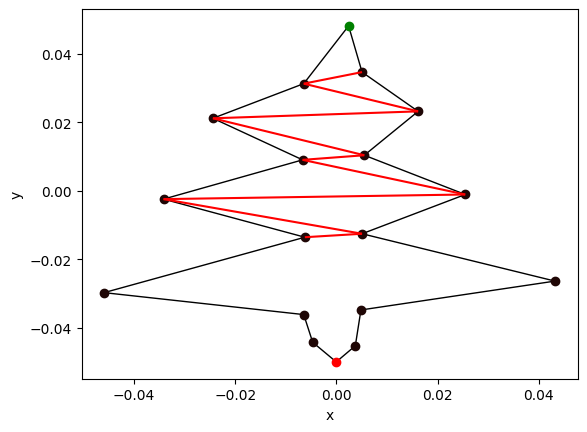

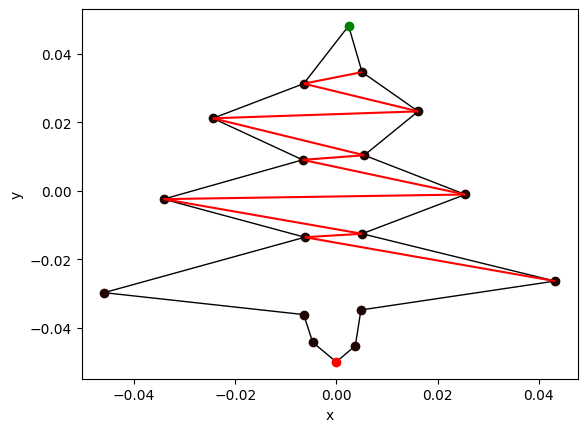

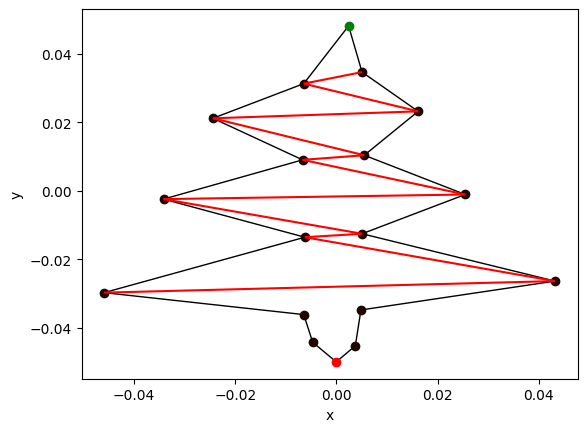

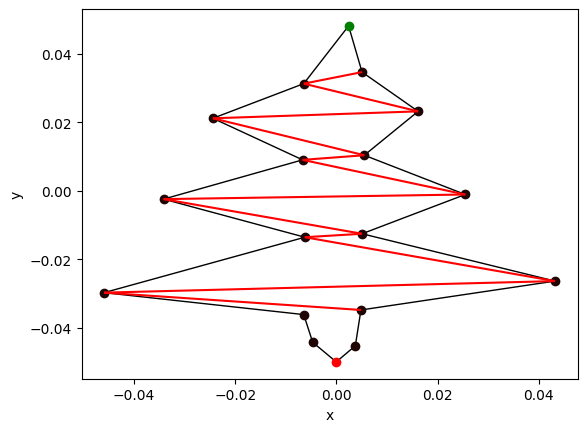

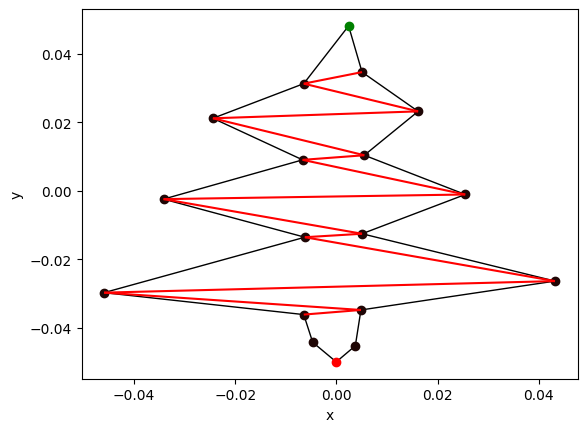

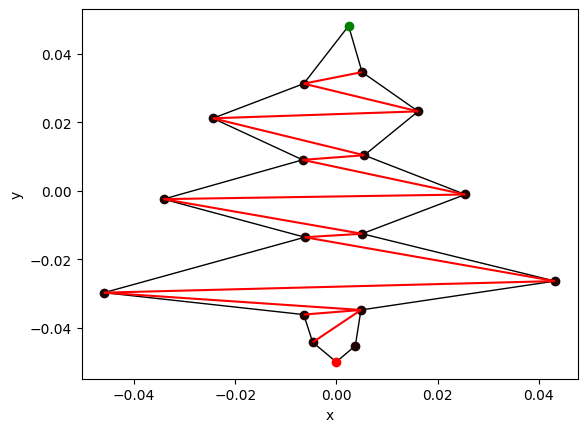

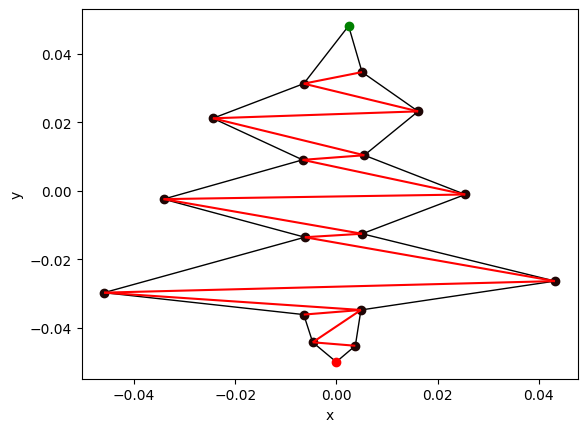

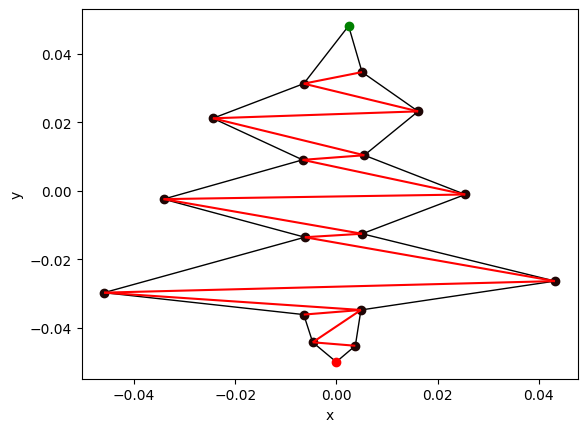

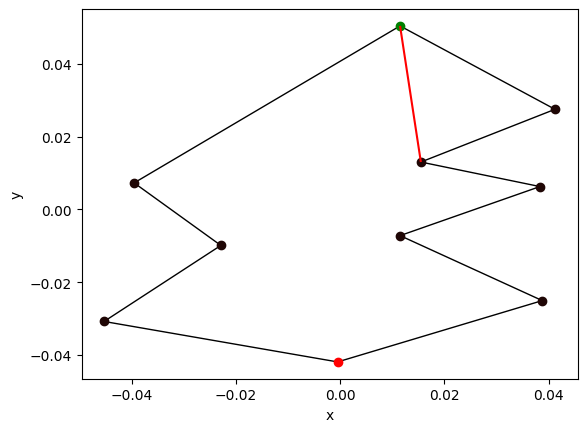

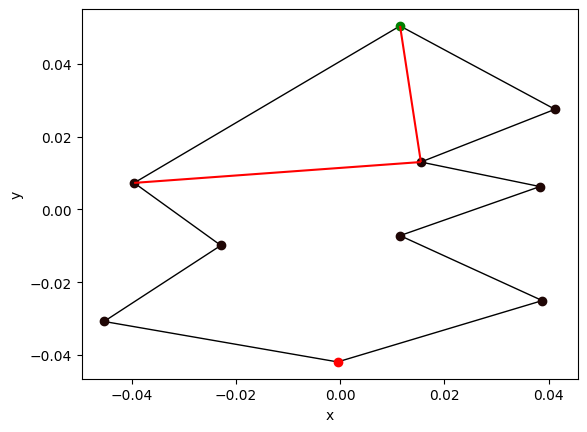

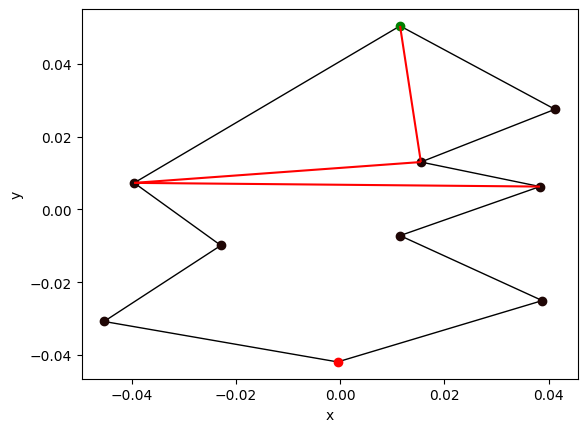

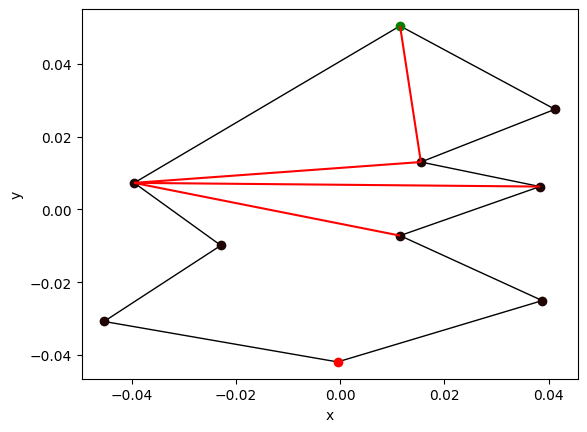

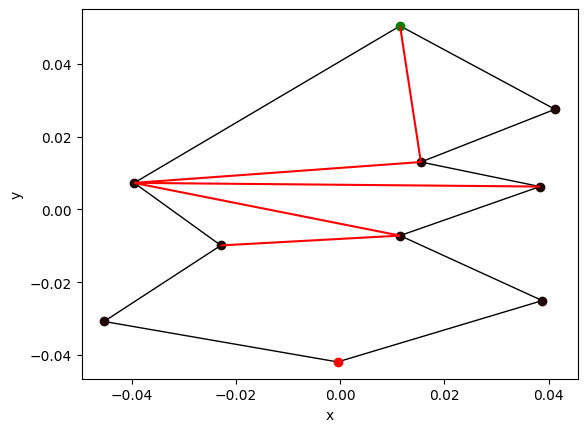

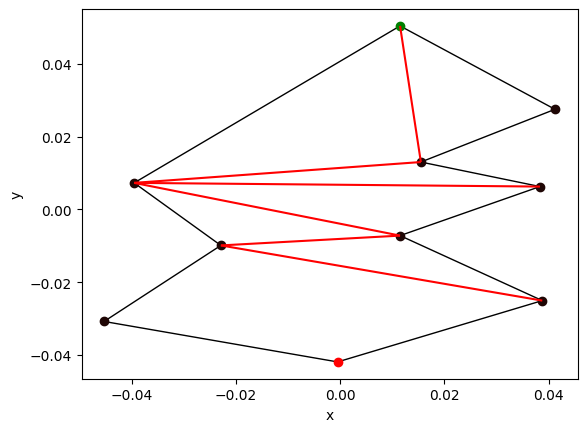

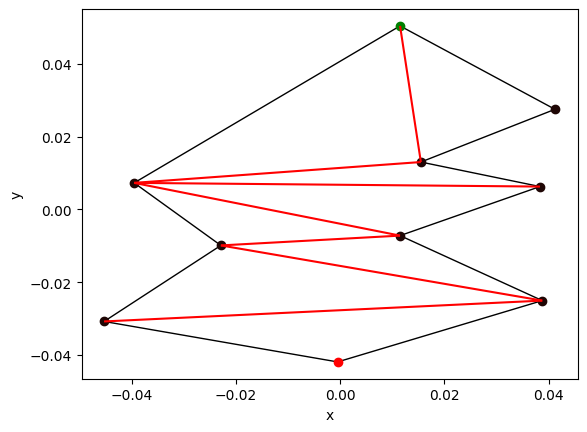

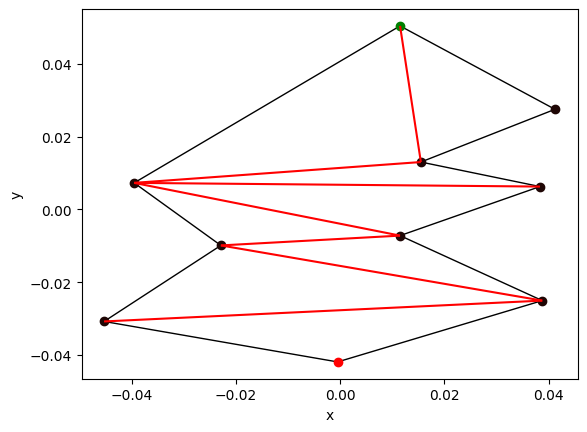

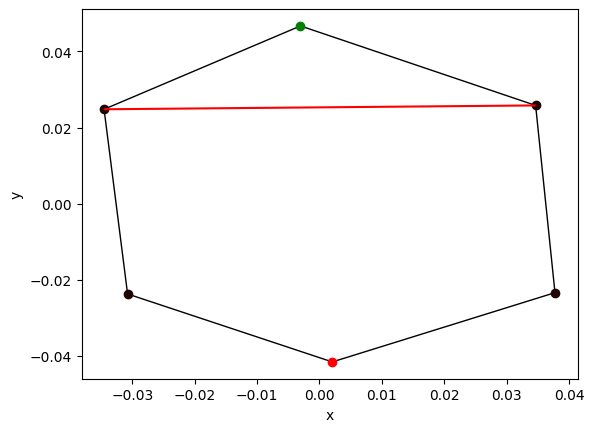

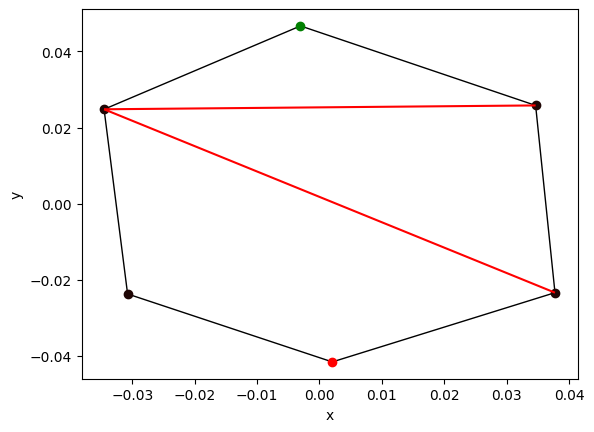

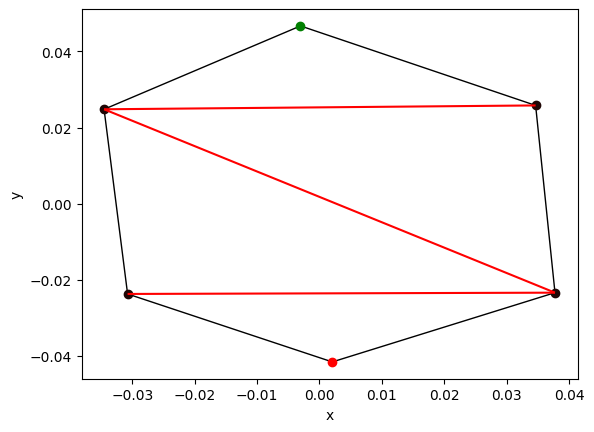

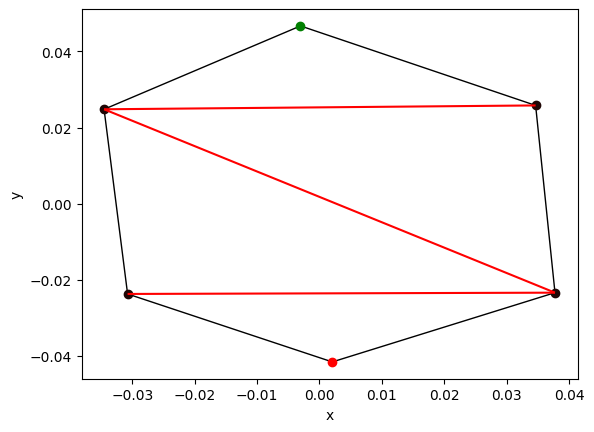

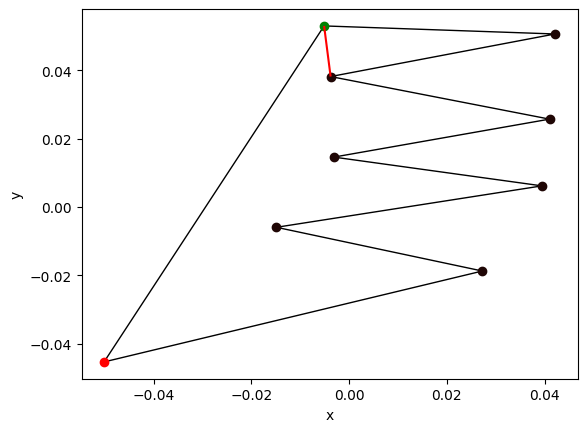

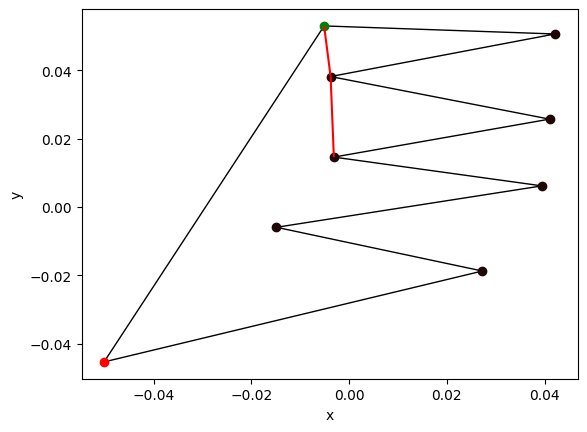

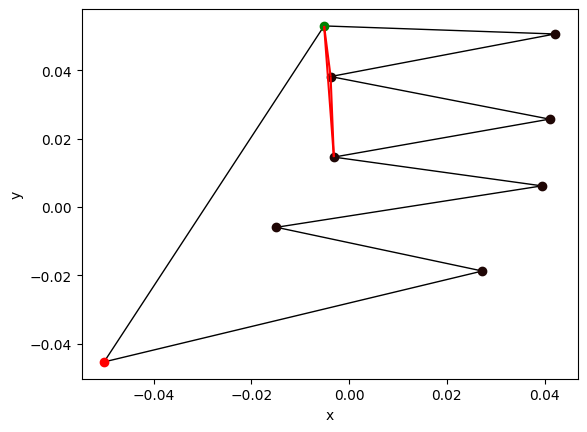

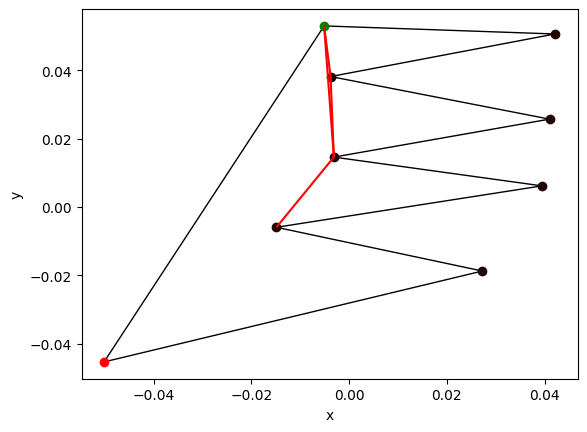

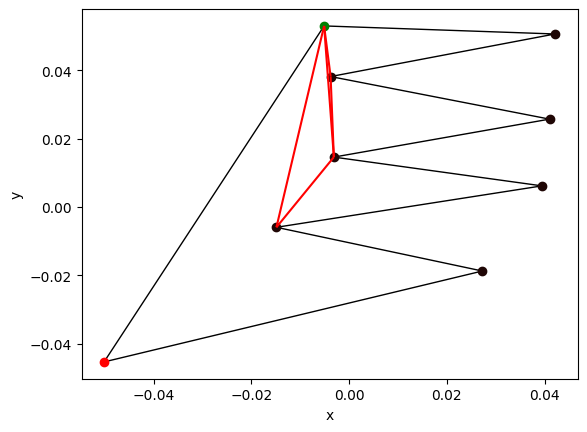

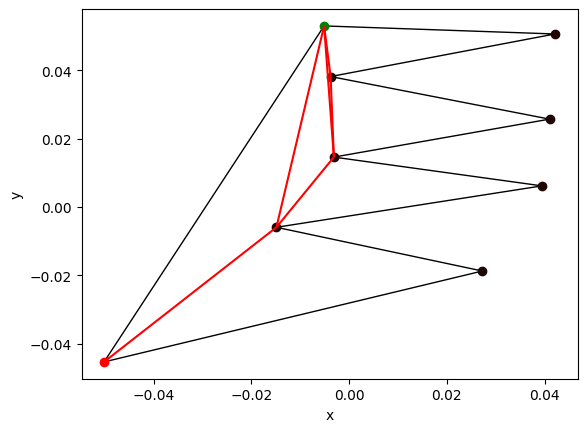

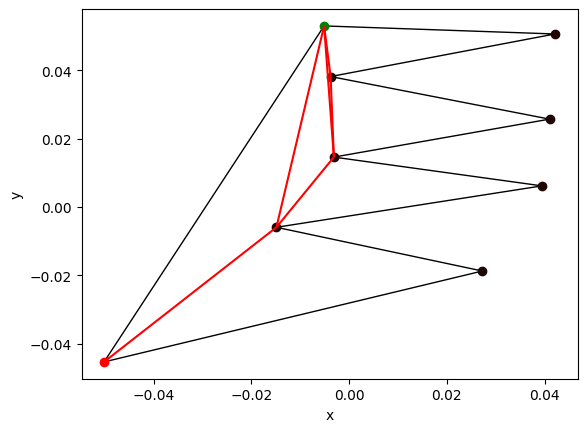

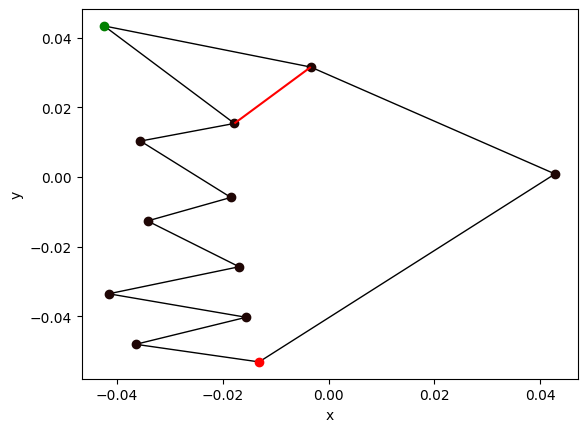

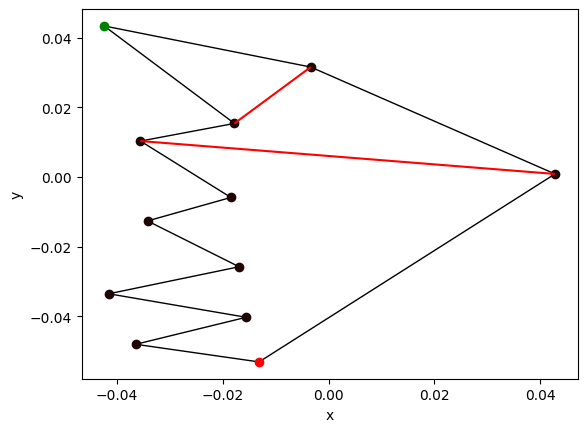

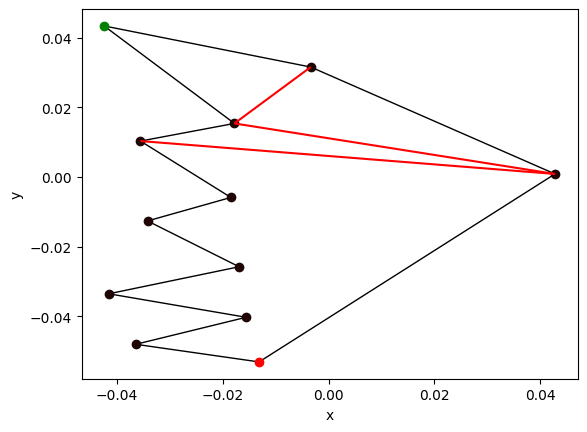

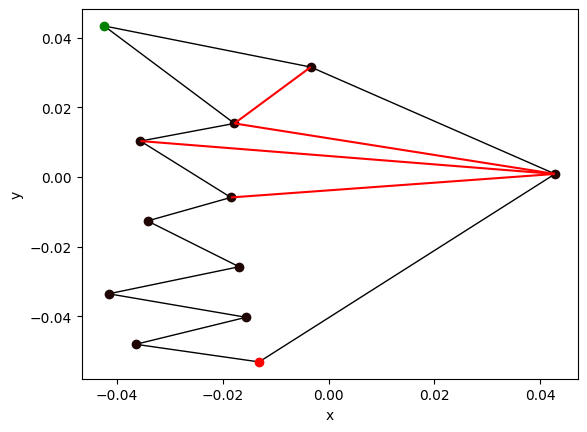

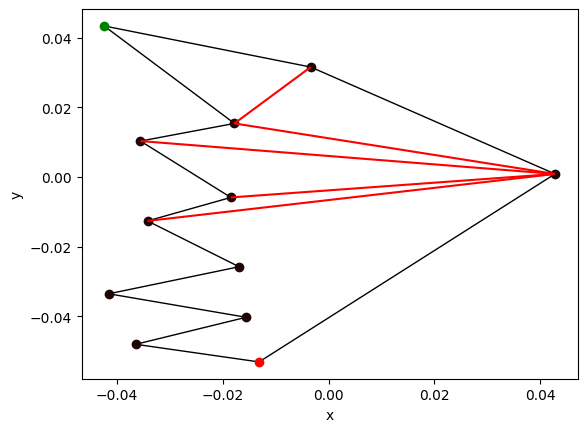

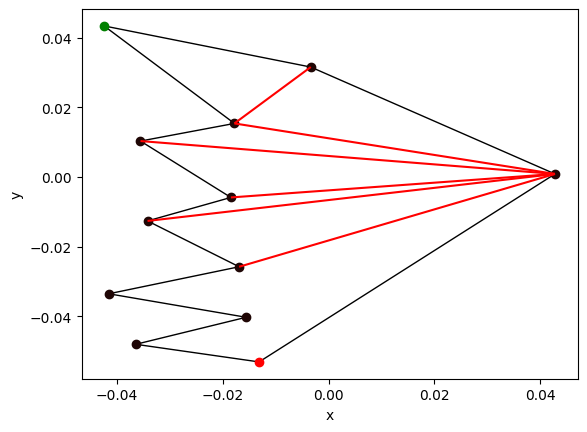

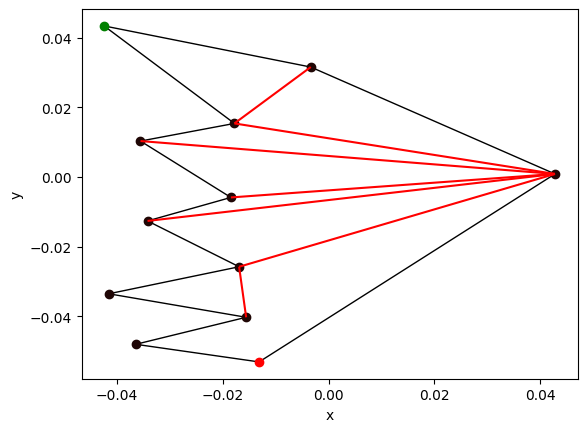

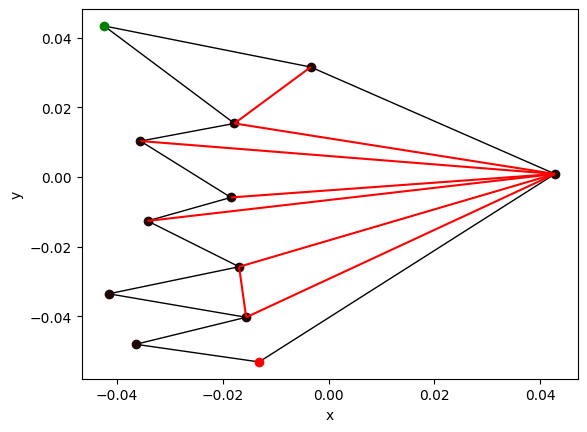

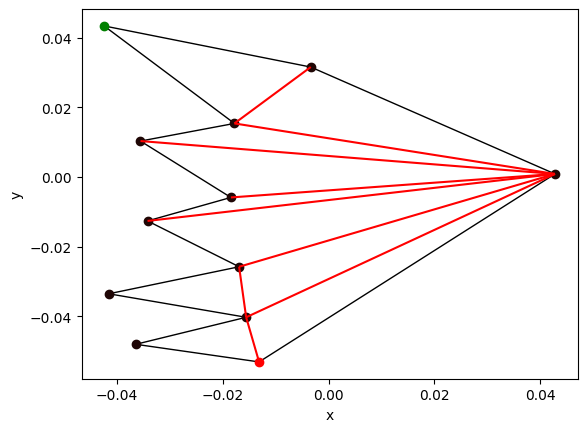

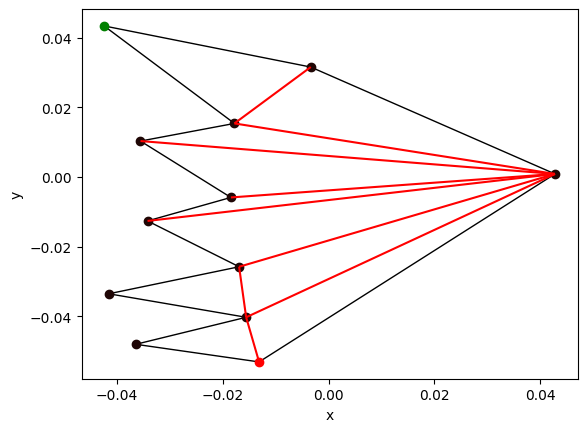

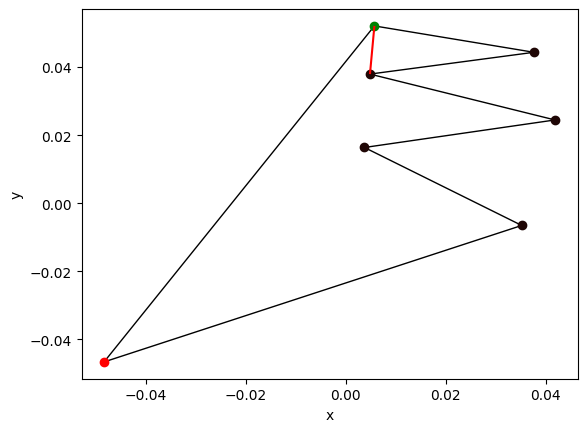

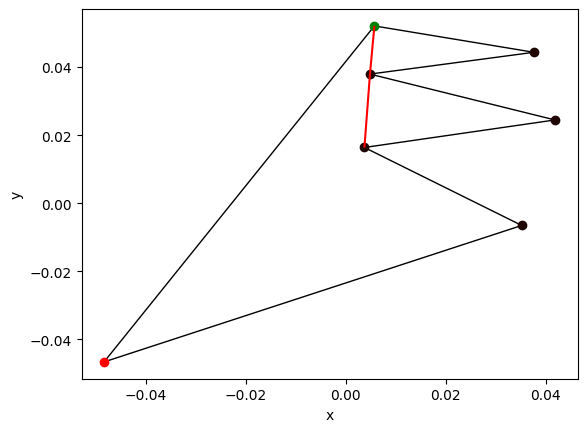

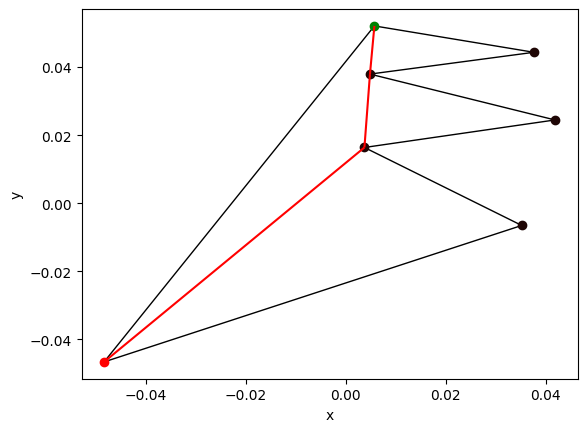

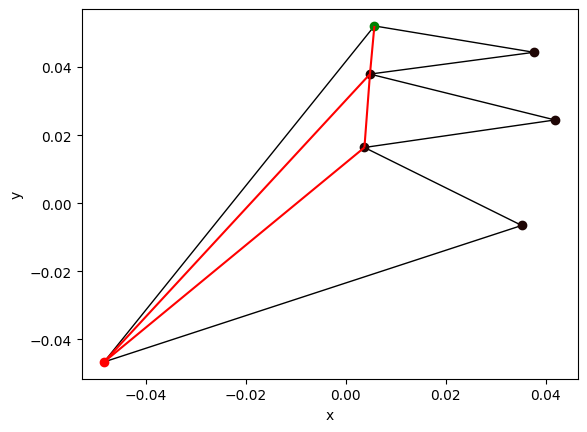

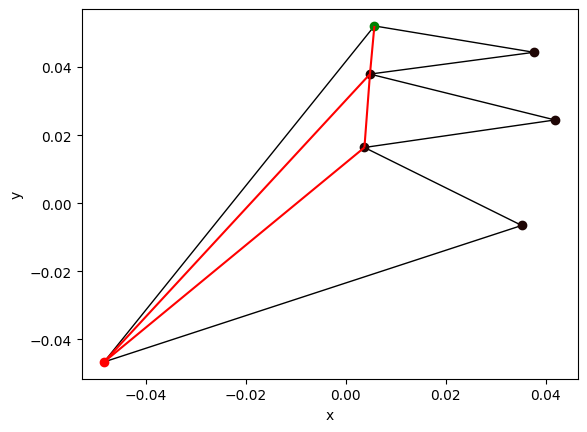

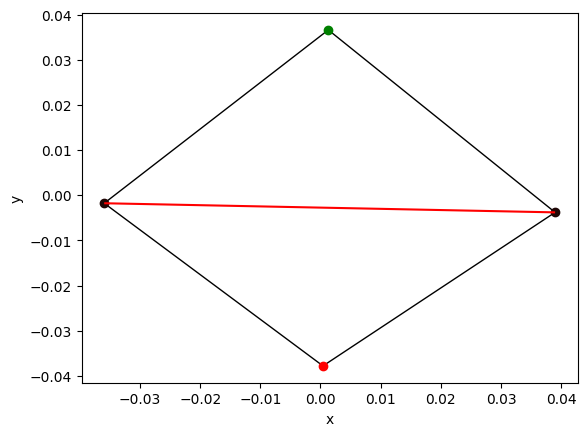

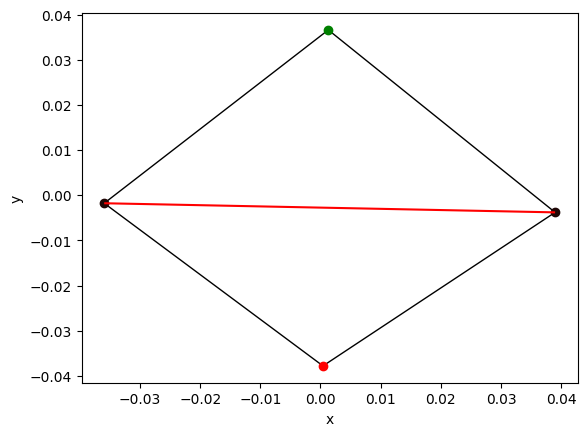

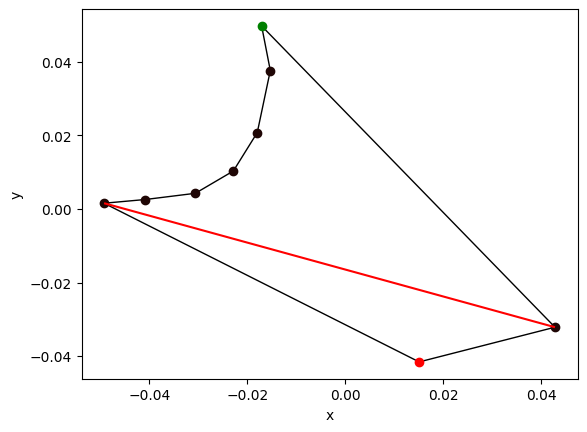

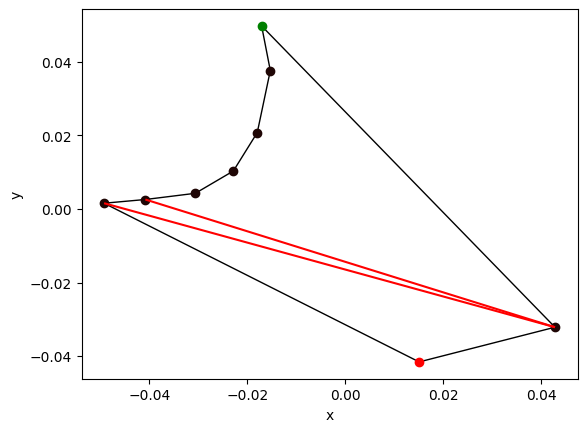

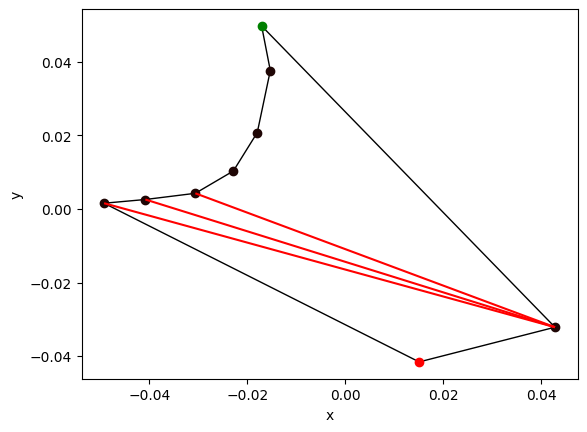

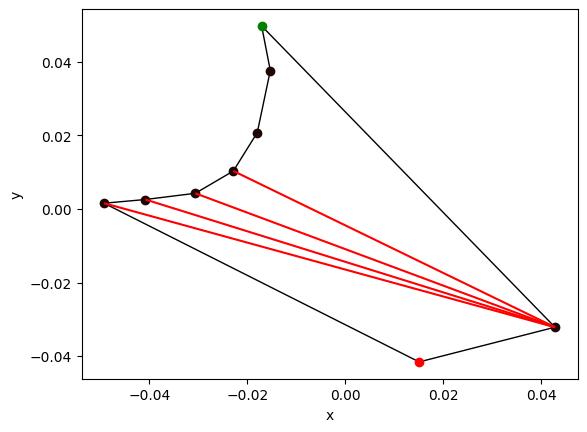

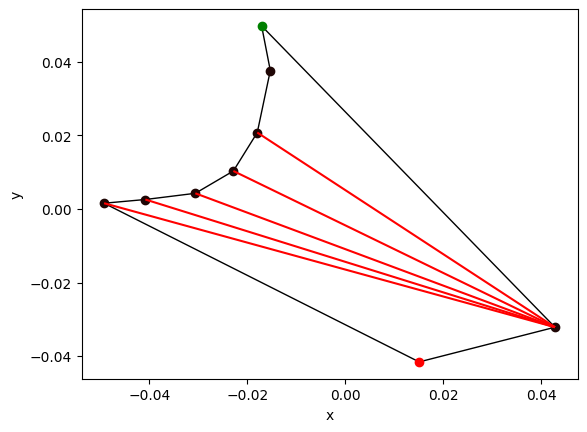

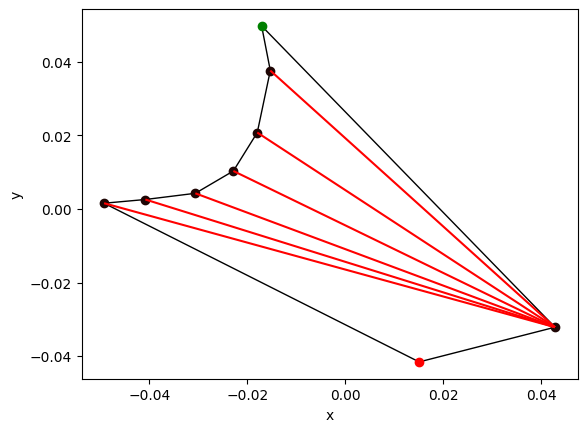

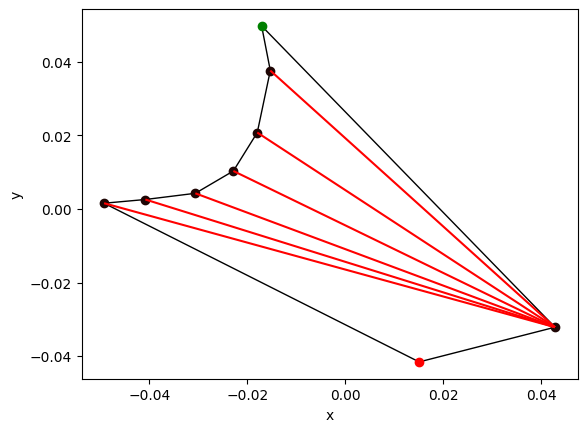

In [589]:
Test().runtest(3, triangulation)

Zwizualizuj powstały wielokąt podzielony na trójkąty.

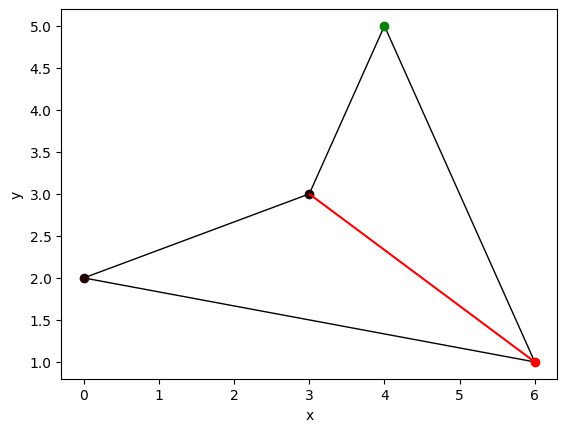

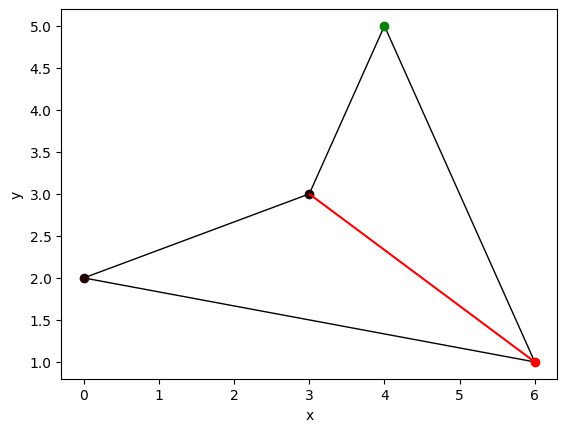

In [590]:
tri = triangulation(polygon)
# draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])

In [591]:
def proper_form(polygon):
    lowest = min(polygon, key=lambda x: x[1])
    lowest_idx = polygon.index(lowest)
    return [polygon[(lowest_idx + i) % len(polygon)] for i in range(len(polygon))]

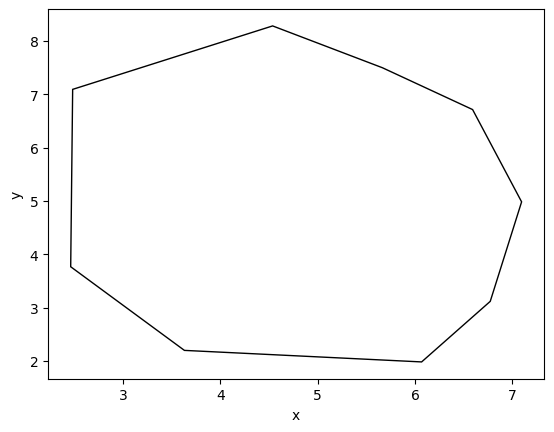

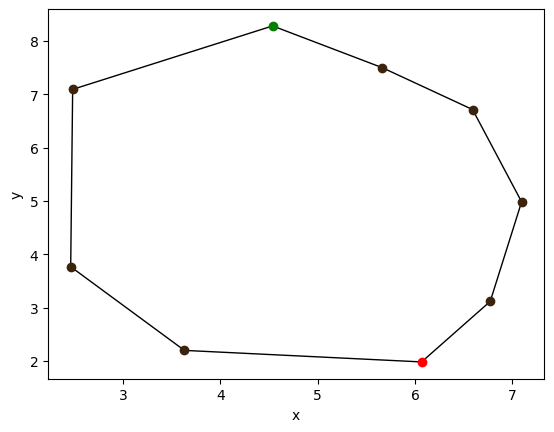

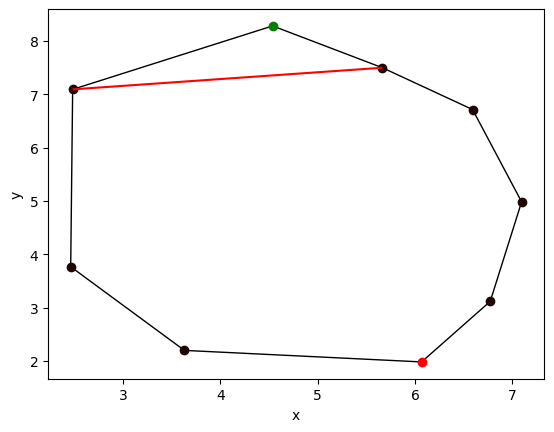

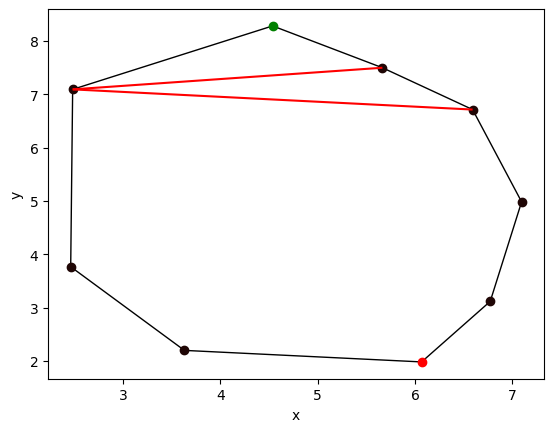

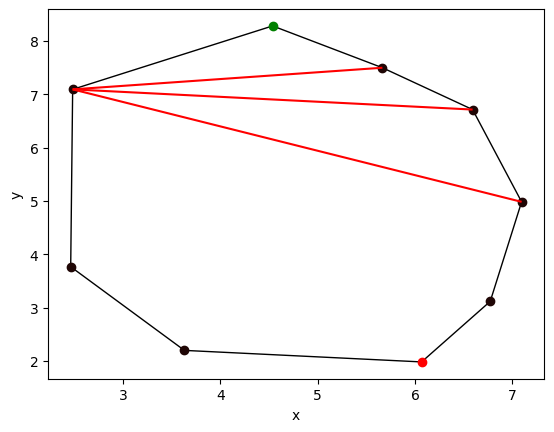

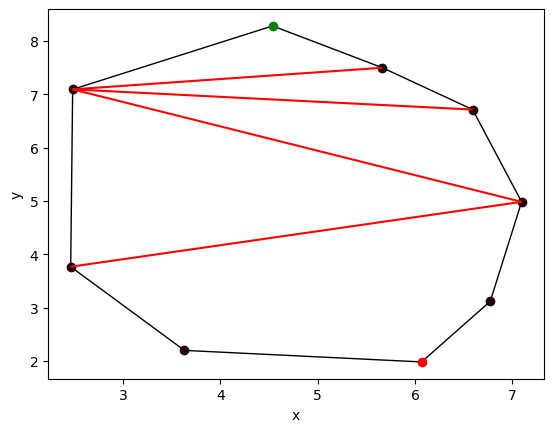

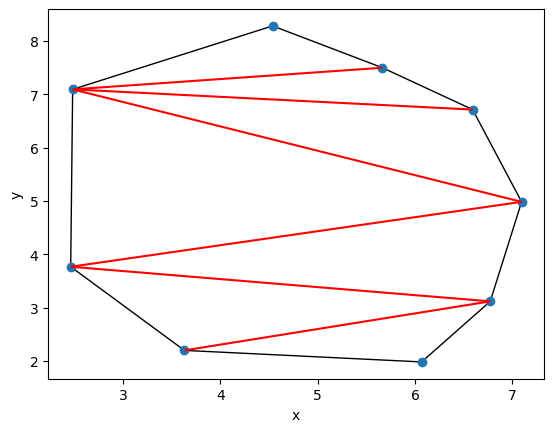

In [592]:
polygon = custom_polygon()
draw_polygon(polygon)
draw_polygon_colors(polygon, color_vertex(polygon))
tri = triangulation(polygon, True)
draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])

IndexError: list index out of range

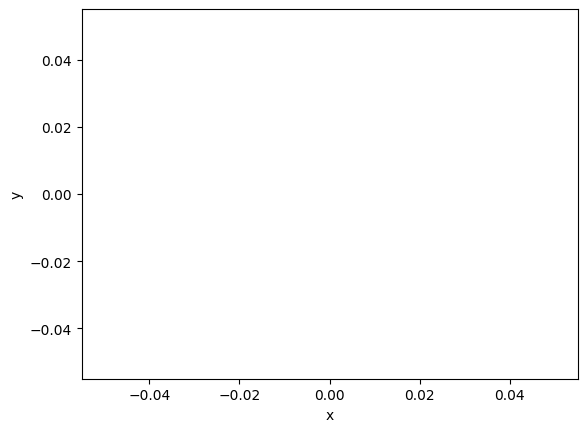

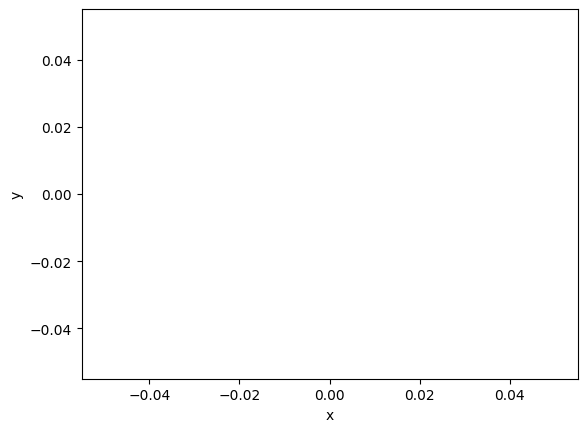

In [593]:
polygon = custom_polygon()
draw_polygon(polygon)
draw_polygon_colors(polygon, color_vertex(polygon))
tri = triangulation(polygon, True)
draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])

In [ ]:
polygon = custom_polygon()
draw_polygon(polygon)
draw_polygon_colors(polygon, color_vertex(polygon))
tri = triangulation(polygon, True)
draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])